<a href="https://colab.research.google.com/github/Piyushagg19/IDS-2018/blob/main/FFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**IDS**

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn
from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/IDS-2018/02-16-2018.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.describe()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575.0,1048575.0,1048575,1048575,1048575.0,1048575.0,1048575.0,1048575.0,1048575.0,1048575.0,1048575,1048575,1048575,1048575.0,1048575.0,1048575,1048575,1048575,1048575.0,1048575.0,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575.0,1048575.0,1048575,1048575,1048575.0,1048575.0,1048575.0,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575.0,1048575.0,1048575.0,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575.0,1048575,1048575,1048575.0,1048575.0,1048575,1048575,1048575
unique,14464,7,3178,453876,43,37,481,862,182,7,936.0,974.0,269,6,1629.0,1355.0,466738.0,490239.0,482016.0,495263.0,408374,59293,444573,453999.0,483928.0,413892,60511,201982,216668.0,237517.0,185603,39421,5,3,3,3,80,76,471211.0,406414.0,5,35,2199.0,2289.0,2289.0,4,5,5,5,5,5,3,5,10,2192.0,936.0,1629.0,3,3,3,3,3,3,43,481,37,862,42,37,25,11,5696,19.0,5697,5696,46002.0,138.0,46002,46002,4
top,80,6,16/02/2018 01:45:28,2,5,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,1000000.0,2.0,0.0,2,6,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,168,0,500000.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,5,0,0,0,225,-1,0,32,0,0.0,0,0,0.0,0.0,0,0,DoS attacks-Hulk
freq,461655,1040250,8403,58706,426407,438014,572790,572823,572790,1040366,572790.0,572802.0,572823,1040369,572823.0,572837.0,572788.0,58706.0,58706.0,508718.0,58706,112557,134812,134812.0,511139.0,134812,134812,570418,570418.0,572016.0,570418,570418,1040345,1040383,1040383,1040383,425965,438014,58717.0,438014.0,1040371,572788,572788.0,572788.0,572788.0,1039116,1040345,1040381,893790,892390,1013987,1040383,1040381,847479,572788.0,572790.0,572823.0,1040383,1040383,1040383,1040383,1040383,1040383,426407,572790,438014,572823,446265,438026,572826,905621,1031324,1040366.0,1031324,1031324,982182.0,1040244.0,982182,982182,461912


In [ ]:
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,16/02/2018 08:27:23,112640768,3,0,0,0,0,0,0,0,0,0,0,0,0,0.0266333,5.63e+07,138.593,56300000,56300000,113000000,5.63e+07,138.593,56300000,56300000,0,0,0,0,0,0,0,0,0,0,0,0.0266333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0,0,0,0,5.63e+07,138.593,56300000,56300000,Benign
1,0,0,16/02/2018 08:30:12,112641773,3,0,0,0,0,0,0,0,0,0,0,0,0,0.0266331,5.63e+07,263.751,56300000,56300000,113000000,5.63e+07,263.751,56300000,56300000,0,0,0,0,0,0,0,0,0,0,0,0.0266331,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0,0,0,0,5.63e+07,263.751,56300000,56300000,Benign
2,35605,6,16/02/2018 08:26:55,20784143,23,44,2416,1344,240,64,105.043,54.5423,64,0,30.5455,32.3365,180.907,3.22361,314911,1.14595e+06,9058214,66,20700000,940484,1.89833e+06,9144734,66,20700000,482352,1.39641e+06,9058214,41601,1,0,0,0,460,880,1.10661,2.117,0,240,56.2353,53.8517,2900,0,1,0,0,1,0,0,0,1,57.0746,105.043,30.5455,0,0,0,0,0,0,23,2416,44,1344,263,255,22,20,2624734,0,2624734,2624734,9.05821e+06,0,9058214,9058214,Benign
3,0,0,16/02/2018 08:33:01,112640836,3,0,0,0,0,0,0,0,0,0,0,0,0,0.0266333,5.63e+07,82.0244,56300000,56300000,113000000,5.63e+07,82.0244,56300000,56300000,0,0,0,0,0,0,0,0,0,0,0,0.0266333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0,0,0,0,5.63e+07,82.0244,56300000,56300000,Benign
4,23,6,16/02/2018 08:27:59,20,1,1,0,0,0,0,0,0,0,0,0,0,0,100000,20,0,20,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,20,50000,50000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,58856,0,0,20,0,0,0,0,0,0,0,0,Benign


In [ ]:
df.drop(df.loc[df['Label'] == 'Label'].index, inplace=True)

In [ ]:
metadata = ['fl_dur' #Flow duration
,'tot_fw_pk' #Total packets in the forward direction
,'tot_bw_pk' #Total packets in the backward direction
,'tot_l_fw_pkt' #Total size of packet in forward direction
,'fw_pkt_l_max' #Maximum size of packet in forward direction
,'fw_pkt_l_min' #Minimum size of packet in forward direction
,'fw_pkt_l_avg' #Average size of packet in forward direction
,'fw_pkt_l_std' #Standard deviation size of packet in forward direction
,'Bw_pkt_l_max' #Maximum size of packet in backward direction
,'Bw_pkt_l_min' #Minimum size of packet in backward direction
,'Bw_pkt_l_avg' #Mean size of packet in backward direction
,'Bw_pkt_l_std' #Standard deviation size of packet in backward direction
,'fl_byt_s' #flow byte rate that is number of packets transferred per second
,'fl_pkt_s' #flow packets rate that is number of packets transferred per second
,'fl_iat_avg' #Average time between two flows
,'fl_iat_std' #Standard deviation time two flows
,'fl_iat_max' #Maximum time between two flows
,'fl_iat_min' #Minimum time between two flows
,'fw_iat_tot' #Total time between two packets sent in the forward direction
,'fw_iat_avg' #Mean time between two packets sent in the forward direction
,'fw_iat_std' #Standard deviation time between two packets sent in the forward direction
,'fw_iat_max' #Maximum time between two packets sent in the forward direction
,'fw_iat_min' #Minimum time between two packets sent in the forward direction
,'bw_iat_tot' #Total time between two packets sent in the backward direction
,'bw_iat_avg' #Mean time between two packets sent in the backward direction
,'bw_iat_std' #Standard deviation time between two packets sent in the backward direction
,'bw_iat_max' #Maximum time between two packets sent in the backward direction
,'bw_iat_min' #Minimum time between two packets sent in the backward direction
,'fw_psh_flag' #Number of times the PSH flag was set in packets travelling in the forward direction (0 for UDP)
,'bw_psh_flag' #Number of times the PSH flag was set in packets travelling in the backward direction (0 for UDP)
,'fw_urg_flag' #Number of times the URG flag was set in packets travelling in the forward direction (0 for UDP)
,'bw_urg_flag' #Number of times the URG flag was set in packets travelling in the backward direction (0 for UDP)
,'fw_hdr_len' #Total bytes used for headers in the forward direction
,'bw_hdr_len' #Total bytes used for headers in the forward direction
,'fw_pkt_s' #Number of forward packets per second
,'bw_pkt_s' #Number of backward packets per second
,'pkt_len_min' #Minimum length of a flow
,'pkt_len_max' #Maximum length of a flow
,'pkt_len_avg' #Mean length of a flow
,'pkt_len_std' #Standard deviation length of a flow
,'pkt_len_va' #Minimum inter-arrival time of packet
,'fin_cnt' #Number of packets with FIN
,'syn_cnt' #Number of packets with SYN
,'rst_cnt' #Number of packets with RST
,'pst_cnt' #Number of packets with PUSH
,'ack_cnt' #Number of packets with ACK
,'urg_cnt' #Number of packets with URG
,'cwe_cnt' #Number of packets with CWE
,'ece_cnt' #Number of packets with ECE
,'down_up_ratio' #Download and upload ratio
,'pkt_size_avg' #Average size of packet
,'fw_seg_avg' #Average size observed in the forward direction
,'bw_seg_avg' #Average size observed in the backward direction
,'fw_byt_blk_avg' #Average number of bytes bulk rate in the forward direction
,'fw_pkt_blk_avg' #Average number of packets bulk rate in the forward direction
,'fw_blk_rate_avg' #Average number of bulk rate in the forward direction
,'bw_byt_blk_avg' #Average number of bytes bulk rate in the backward direction
,'bw_pkt_blk_avg' #Average number of packets bulk rate in the backward direction
,'bw_blk_rate_avg' #Average number of bulk rate in the backward direction
,'subfl_fw_pk' #The average number of packets in a sub flow in the forward direction
,'subfl_fw_byt' #The average number of bytes in a sub flow in the forward direction
,'subfl_bw_pkt' #The average number of packets in a sub flow in the backward direction
,'subfl_bw_byt' #The average number of bytes in a sub flow in the backward direction
,'fw_win_byt' #Number of bytes sent in initial window in the forward direction
,'bw_win_byt' ## of bytes sent in initial window in the backward direction
,'Fw_act_pkt' ## of packets with at least 1 byte of TCP data payload in the forward direction
,'fw_seg_min' #Minimum segment size observed in the forward direction
,'atv_avg' #Mean time a flow was active before becoming idle
,'atv_std' #Standard deviation time a flow was active before becoming idle
,'atv_max' #Maximum time a flow was active before becoming idle
,'atv_min' #Minimum time a flow was active before becoming idle
,'idl_avg' #Mean time a flow was idle before becoming active
,'idl_std' #Standard deviation time a flow was idle before becoming active
,'idl_max' #Maximum time a flow was idle before becoming active
,'idl_min' #Minimum time a flow was idle before becoming active
]

In [ ]:
df.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [ ]:
def targetify(s):
    if s == 'Benign':
        return 0
    else:
        return 1

## **FFNN**

**Binary Class**

In [ ]:
features = ['Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']

In [ ]:
X = df[features]
X[features] = X[features].apply(pd.to_numeric, errors='coerce', axis=1)
X = X.fillna(0)
labels = df['Label']    #For multiclass classification
df['Target']=df['Label'].apply(targetify)
y = df['Target']

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X.values)
X = pd.DataFrame(x_scaled,columns=features)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# print (X_train.shape, y_train.shape)
# print( X_test.shape, y_test.shape)

In [ ]:
# clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X, y)
# coefs = clf.coef_[0]
# clf.intercept_

In [ ]:
# Table = []
# Row = []
# for i in range(0,len(coefs)):
#     Row.append(features[i])
#     Row.append(coefs[i])
#     Table.append(Row)
#     Row= []
# coefficientsDF = pd.DataFrame(Table,columns=['Feature','Coefficient'])
# coefficientsDF.sort_values(by='Coefficient')
# filteredFeatures = coefficientsDF[coefficientsDF['Coefficient']!=0]['Feature'].values
# featuresRemoved = len(coefficientsDF['Feature'].values) - len(filteredFeatures)
# print('removed', str(featuresRemoved), 'features')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(838860, 76) (838860,)
(209715, 76) (209715,)


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train.values, y_train.values, epochs=5)
model.save('drive/MyDrive/IDS-2018/FFNN_BC')

Epoch 1/5
26215/26215 [==============================] - 37s 1ms/step - loss: 0.0197 - accuracy: 0.9968
Epoch 2/5
26215/26215 [==============================] - 36s 1ms/step - loss: 0.0117 - accuracy: 0.9983
Epoch 3/5
26215/26215 [==============================] - 36s 1ms/step - loss: 0.0118 - accuracy: 0.9982
Epoch 4/5
26215/26215 [==============================] - 36s 1ms/step - loss: 0.0116 - accuracy: 0.9983
Epoch 5/5
26215/26215 [==============================] - 36s 1ms/step - loss: 0.0114 - accuracy: 0.9983
INFO:tensorflow:Assets written to: drive/MyDrive/IDS-2018/FFNN_BC/assets


In [ ]:
predictions = model.predict(X_test.values)[:,1]
predictions = [int(round(x)) for x in predictions]
np.sum(predictions == y_test.values) / len(y_test.values)

0.998407362372744

In [ ]:
confMat = confusion_matrix(y_test.values, predictions)
confMat

array([[ 88870,    334],
       [     0, 120511]])

**Multicalss**

In [ ]:
categories = ['Benign', 'FTP-BruteForce', 'SSH-Bruteforce',
              'DoS attacks-GoldenEye', 'DoS attacks-Slowloris', 'DoS attacks-SlowHTTPTest',
              'DoS attacks-Hulk', 'Brute Force -Web', 'Brute Force -XSS',
              'SQL Injection', 'Infiltration', 'Bot']

In [ ]:
labels = df['Label']

In [ ]:
encoder = LabelEncoder()
encoder.fit(categories)
y = encoder.transform(labels)
y = np_utils.to_categorical(y, num_classes=12)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(12, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train.values, y_train.values, epochs=5)
model.save('drive/MyDrive/IDS-2018/FFNN_MC')

Epoch 1/5
26215/26215 [==============================] - 40s 1ms/step - loss: 0.0407 - accuracy: 0.9929
Epoch 2/5
26215/26215 [==============================] - 39s 1ms/step - loss: 0.0123 - accuracy: 0.9982
Epoch 3/5
26215/26215 [==============================] - 39s 1ms/step - loss: 0.0116 - accuracy: 0.9983
Epoch 4/5
26215/26215 [==============================] - 39s 1ms/step - loss: 0.0122 - accuracy: 0.9981
Epoch 5/5
26215/26215 [==============================] - 39s 1ms/step - loss: 0.0110 - accuracy: 0.9983
INFO:tensorflow:Assets written to: drive/MyDrive/IDS-2018/FFNN_MC/assets


In [ ]:
predictions = model.predict(X_test.values)[:,1]
predictions = [int(round(x)) for x in predictions]
np.sum(predictions == y_test.values) / len(y_test.values)

0.998407362372744

In [ ]:
confMat = confusion_matrix(y_test.values, predictions)
confMat

array([[ 88870,    334],
       [     0, 120511]])

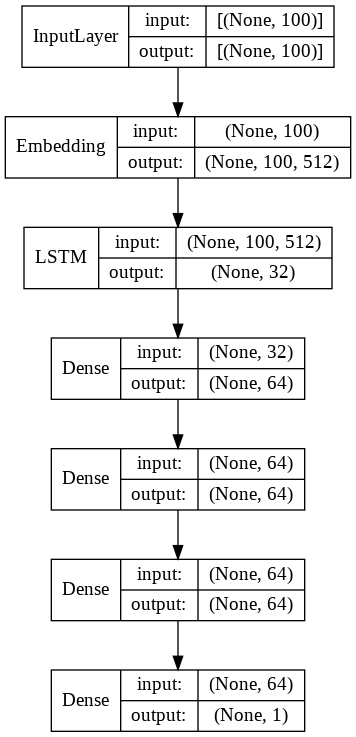

In [22]:
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)